In [1]:
import pandas as pd
import numpy as np
import gzip
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

from read_all_data import categories

plt.rcParams["figure.figsize"] = (13, 6)

# Provide data

In [2]:
def provide_data(categories):
    all_data = pd.DataFrame()
    for categ in categories:
        print(f"Processing: {categ}")
        df = pd.read_csv(f"data/raw/{categ}.csv")
        df.drop("Unnamed: 0", axis=1, inplace=True)  # TODO
        df["year"] = df['time'].astype('datetime64[ns]').dt.year
        df["category"] = categ
        all_data = pd.concat([all_data, df])
    return all_data

In [3]:
# categories = categories[:3]  # TODO
df = provide_data(categories)

Processing: Amazon_Instant_Video
Processing: Arts
Processing: Automotive
Processing: Baby
Processing: Beauty
Processing: Cell_Phones_&_Accessories
Processing: Clothing_&_Accessories
Processing: Electronics
Processing: Gourmet_Foods
Processing: Health
Processing: Home_&_Kitchen
Processing: Industrial_&_Scientific
Processing: Jewelry
Processing: Kindle_Store
Processing: Musical_Instruments
Processing: Office_Products
Processing: Patio
Processing: Pet_Supplies
Processing: Shoes
Processing: Software
Processing: Sports_&_Outdoors
Processing: Tools_&_Home_Improvement
Processing: Toys_&_Games
Processing: Video_Games
Processing: Watches


In [4]:
df

,productId,price,userId,helpfulness_num,helpfulness_den,score,time,year,category
0,B002BNZ2XE,0.00,A2Z8GGXKF1W48Y,3,3,4.0,2008-02-08,2008,Amazon_Instant_Video
1,B002BNZ2XE,0.00,AZVY9Y3A0YU1I,1,1,4.0,2010-06-25,2010,Amazon_Instant_Video
2,B002BNZ2XE,0.00,A2582KMXLK2P06,2,3,4.0,2009-08-31,2009,Amazon_Instant_Video
3,B002BNZ2XE,0.00,A26R4PDCZX5SOK,1,2,2.0,2009-10-16,2009,Amazon_Instant_Video
4,B002BNZ2XE,0.00,unknown,5,10,5.0,2004-07-12,2004,Amazon_Instant_Video
...,...,...,...,...,...,...,...,...,...
68351,B000LET1KU,unknown,A2Q1V8EBYFMXSO,0,1,3.0,2009-08-02,2009,Watches
68352,B000I5M96A,unknown,A2YDSCQB2W0C8S,1,1,5.0,2008-05-02,2008,Watches
68353,B000I5M96A,unknown,A247QMDU9ZQASZ,0,0,3.0,2010-05-03,2010,Watches
68354,B000ISLYYK,unknown,A1LRT7C0CP8M3S,0,0,4.0,2007-06-09,2007,Watches


In [5]:
display(f"Total number of opinions: {df.shape[0]}")
display(f"Number of opinions given by known users: {df.loc[df['userId'] != 'unknown', ].shape[0]}")

'Total number of opinions: 8225990'

'Number of opinions given by known users: 7880622'

# Users and products

## by years

In [6]:
by_year_counts = df[["year", "productId", "userId"]].groupby("year").nunique()
by_year_counts = pd.concat([by_year_counts, pd.DataFrame(df[["year", "productId", "userId"]].drop("year", axis=1).nunique()).transpose()])
by_year_counts

,productId,userId
1969,10,43
1995,6,1
1996,49,2
1997,232,79
1998,1356,774
1999,6467,6882
2000,17476,31767
2001,22130,53015
2002,30630,68079
2003,39983,79137


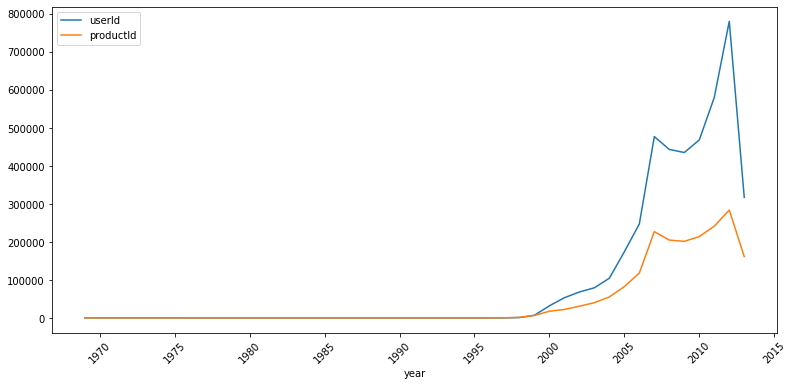

In [7]:
data_to_plot = df[["userId", "productId", "year"]].groupby("year").nunique()
data_to_plot.plot()
plt.title("Number of unique")
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(rotation=45)
plt.show()

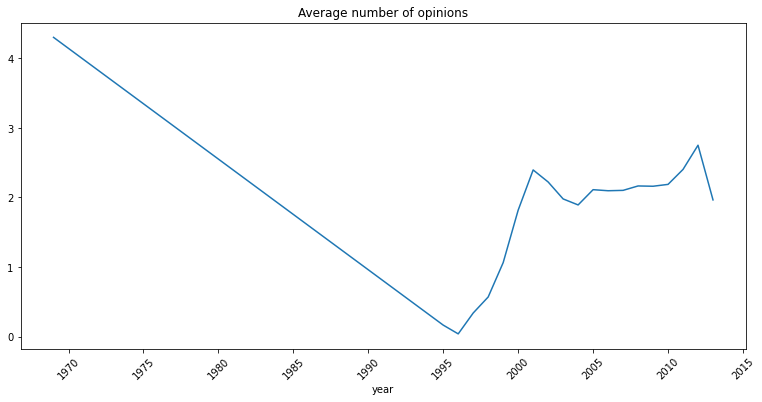

In [8]:
data_to_plot["average"] = data_to_plot["userId"] / data_to_plot["productId"] 
data_to_plot["average"].plot()
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(rotation=45)
plt.title("Average number of opinions")
plt.show()

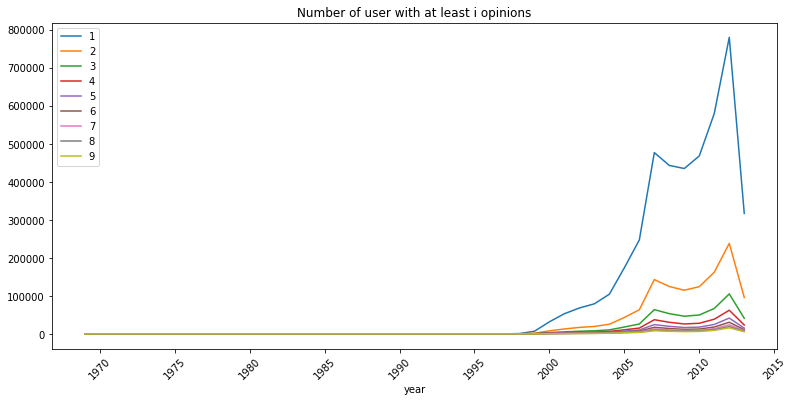

In [9]:
min_opinions = 10

user_counts = df[["userId", "year", "productId"]].groupby(["userId", "year"]).count().reset_index()
user_counts = user_counts.loc[user_counts["userId"] != "unknown", ]
for i in range(1, min_opinions):
    user_counts[f"{i}"] = user_counts["productId"] >= i
user_counts.drop("productId", axis=1).groupby("year").sum().plot()
plt.title(f"Number of user with at least i opinions")
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(rotation=45)
plt.show()

In [10]:
user_counts

,userId,year,productId,1,2,3,4,5,6,7,8,9
0,A00013803RVZPCZKTT9U,2012,1,True,False,False,False,False,False,False,False,False
1,A0001624UKLQG4OFIM8X,2013,1,True,False,False,False,False,False,False,False,False
2,A00030901VWJV5GJH36YV,2012,1,True,False,False,False,False,False,False,False,False
3,A00032403IMUSNRLR3XK7,2012,1,True,False,False,False,False,False,False,False,False
4,A00037441I8XOQJSUWCAG,2012,1,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4265781,AZZZMSZI9LKE6,2013,1,True,False,False,False,False,False,False,False,False
4265782,AZZZOVIBXHGDR,2009,1,True,False,False,False,False,False,False,False,False
4265783,AZZZOVIBXHGDR,2010,1,True,False,False,False,False,False,False,False,False
4265784,AZZZOVIBXHGDR,2011,1,True,False,False,False,False,False,False,False,False


## by categories

In [11]:
df_counts = df[["productId", "userId", "category"]].groupby("category").nunique()
df_counts = pd.concat([df_counts, pd.DataFrame(df[["category", "productId", "userId"]].drop("category", axis=1).nunique()).transpose()])
df_counts

,productId,userId
Amazon_Instant_Video,22204,312930
Arts,4211,24071
Automotive,47577,133256
Baby,6962,123837
Beauty,29004,167725
Cell_Phones_&_Accessories,7438,68041
Clothing_&_Accessories,66370,128794
Electronics,82067,811034
Gourmet_Foods,23476,112544
Health,39539,311636


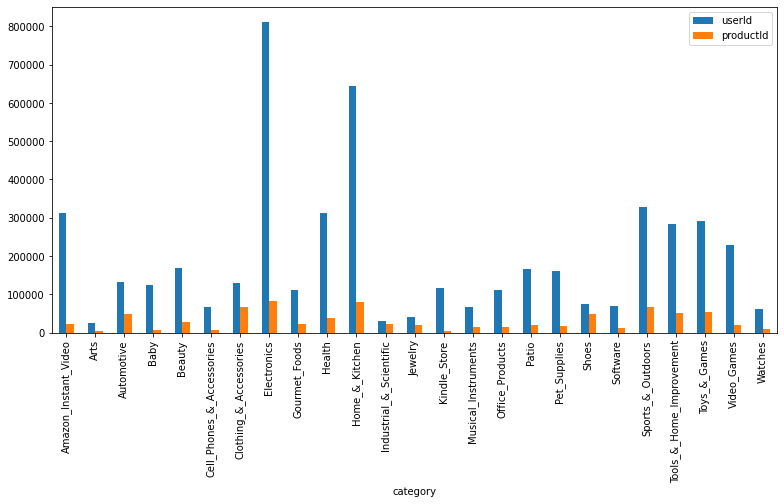

In [12]:
data_to_plot = df[["userId", "productId", "category"]].groupby("category").nunique()
data_to_plot.plot(kind = "bar")
plt.xticks(rotation=90)
plt.show()

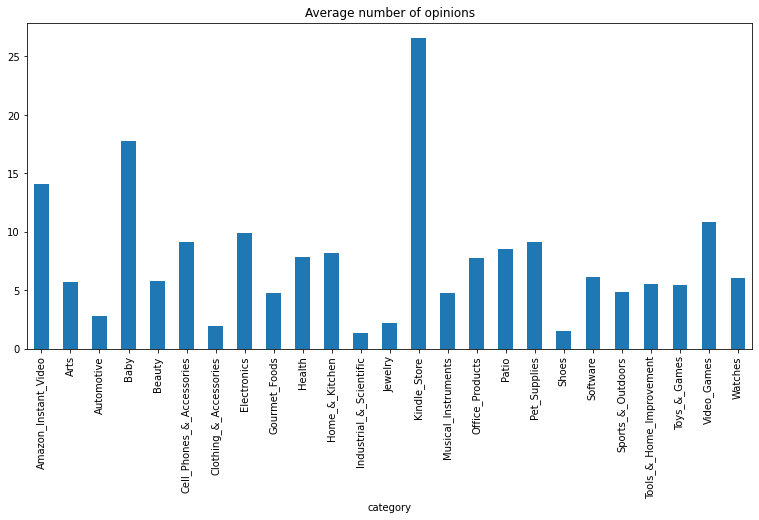

In [13]:
data_to_plot["average"] = data_to_plot["userId"] / data_to_plot["productId"] 
data_to_plot["average"].plot(kind="bar")
plt.xticks(rotation=90)
plt.title("Average number of opinions")
plt.show()

# Scores

## by years

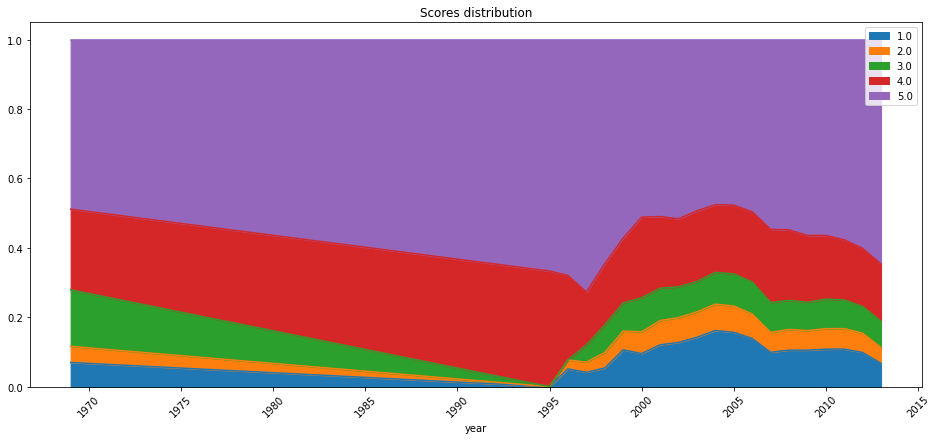

In [14]:
scores_by_years = df[["year", "score", "productId"]].groupby(["year", "score"]).count().reset_index().pivot("year", "score", "productId")
scores_by_years.apply(lambda x: x / x.sum(), axis=1).fillna(0).plot(kind="area")
plt.xticks(rotation=45)
plt.legend(loc=1)
plt.tight_layout()  
plt.title("Scores distribution")
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

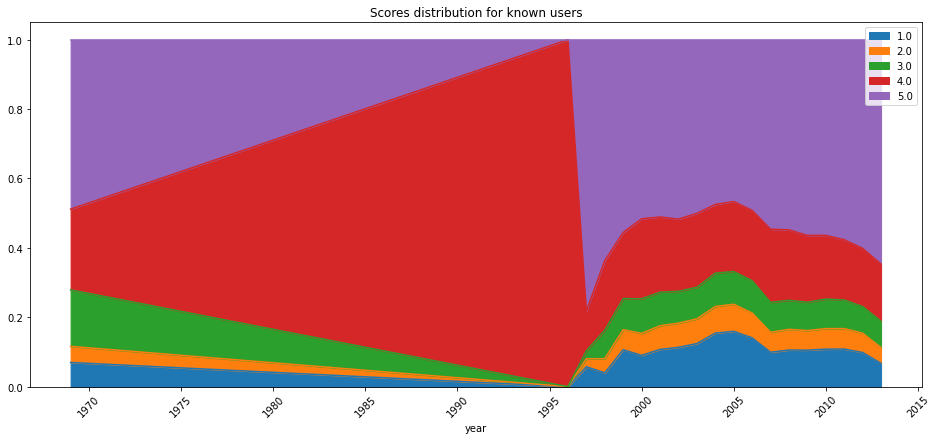

In [15]:
scores_by_years = df.loc[df["userId"] != "unknown" ,["year", "score", "productId"]].groupby(["year", "score"]).count().reset_index().pivot("year", "score", "productId")
scores_by_years.apply(lambda x: x / x.sum(), axis=1).fillna(0).plot(kind="area")
plt.xticks(rotation=45)
plt.legend(loc=1)
plt.tight_layout()  
plt.title("Scores distribution for known users")
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

## by categories

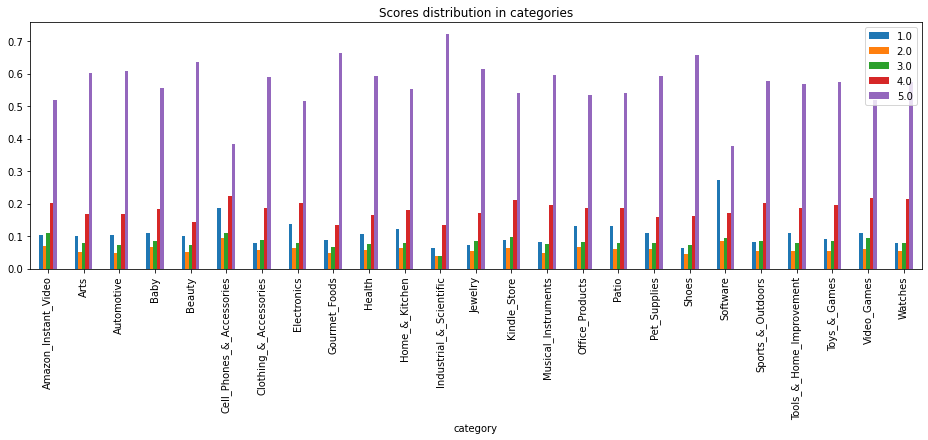

In [16]:
scores_by_years = df[["category", "score", "productId"]].groupby(["category", "score"]).count().reset_index().pivot("category", "score", "productId")
scores_by_years.apply(lambda x: x / x.sum(), axis=1).fillna(0).plot(kind="bar")
plt.xticks(rotation=90)
plt.legend(loc=1)
plt.tight_layout()  
plt.title("Scores distribution in categories")
plt.show()

# Exclusions 

## Approach 1

1. Train on 2011-12

2. Validation - sampled from train

3. Then, train on 2011, 2012. Final testing on 2013.

*Note: 2013 has a bit different distribution than 2007-2012. Let's see how our models can handle it!*

4. For recommender:

    - select the category Kindle_Store

    - drop unknown userId
    
    - drop user with one opinion

    - For final testing:
        
        - drop users not occuring in 2011-12
        - drop products not occuring in 2011-12

In [29]:
df_clean1 = df.loc[(df["userId"] != "unknown") & df["year"].isin([2011, 2012, 2013]), ]

In [30]:
df_clean1.shape

(3303563, 9)

In [31]:
user_no_opinions = df_clean1.loc[df_clean1["year"].isin([2011, 2012]), ["userId", "productId"]].groupby("userId").count()
users = user_no_opinions.loc[user_no_opinions["productId"] > 1, ].index.values

In [32]:
df_clean1 = df_clean1.loc[df_clean1["userId"].isin(users), ]

In [33]:
users2 = df_clean1.loc[df_clean1["year"].isin([2011, 2012]), ]["userId"].drop_duplicates().values
prods = df_clean1.loc[df_clean1["year"].isin([2011, 2012]), ]["productId"].drop_duplicates().values

df_train = df_clean1.loc[df_clean1["userId"].isin(users2) & 
                         df_clean1["year"].isin([2011, 2012]), ]

df_test  = df_clean1.loc[df_clean1["userId"].isin(users2) & 
                         (df_clean1["year"] == 2013) & 
                         df_clean1["productId"].isin(prods), ]

df_test_NLP = df_clean1.loc[df_clean1["year"] == 2013, ]

In [34]:
df_clean1.shape

(1901991, 9)

In [35]:
df_train.shape

(1804171, 9)

In [36]:
df_test.shape

(89432, 9)

### Category analysis

Repeat analysis for cleaned up data

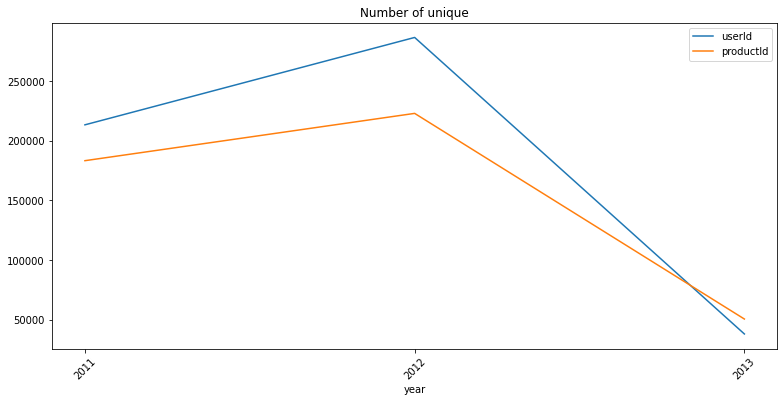

In [37]:
data_to_plot = df_clean1[["userId", "productId", "year"]].groupby("year").nunique()
data_to_plot.plot()
plt.title("Number of unique")
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(rotation=45)
plt.show()

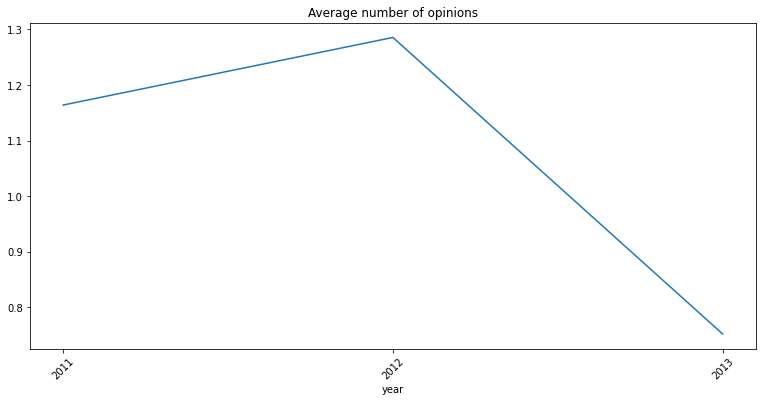

In [38]:
data_to_plot["average"] = data_to_plot["userId"] / data_to_plot["productId"] 
data_to_plot["average"].plot()
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(rotation=45)
plt.title("Average number of opinions")
plt.show()

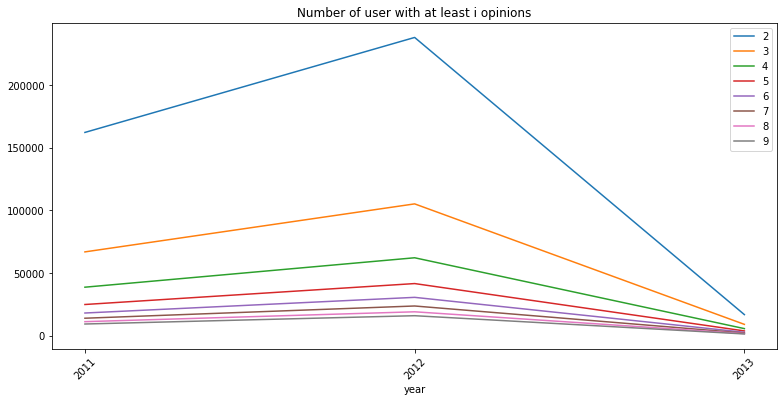

In [39]:
min_opinions = 10

user_counts = df_clean1[["userId", "year", "productId"]].groupby(["userId", "year"]).count().reset_index()
user_counts = user_counts.loc[user_counts["userId"] != "unknown", ]
for i in range(2, min_opinions):
    user_counts[f"{i}"] = user_counts["productId"] >= i
user_counts.drop("productId", axis=1).groupby("year").sum().plot()
plt.title(f"Number of user with at least i opinions")
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:ylabel='Frequency'>

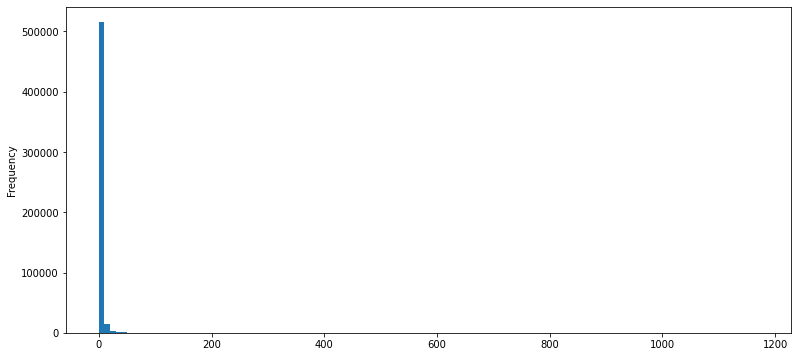

In [58]:
user_counts["productId"].plot(kind="hist", bins = range(0, max(user_counts["productId"]), 10))

In [68]:
user_counts.sort_values("productId", ascending=False).head(100)

,userId,year,productId,2,3,4,5,6,7,8,9
109740,A1RQ3DWTAFPIEG,2012,1174,True,True,True,True,True,True,True,True
512600,ATKCUNJAGUDLR,2012,1135,True,True,True,True,True,True,True,True
14141,A13JR4DLRGE2TZ,2011,1135,True,True,True,True,True,True,True,True
394570,A3S01H5XYF190P,2012,1134,True,True,True,True,True,True,True,True
244761,A2Q09I9WDM3DBG,2012,1134,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
475354,AK3OR6F9IX4XT,2011,552,True,True,True,True,True,True,True,True
308510,A367S8SBD3MGIA,2011,552,True,True,True,True,True,True,True,True
46250,A1BN355T9URMZM,2012,552,True,True,True,True,True,True,True,True
256898,A2T4H7M78QE829,2012,552,True,True,True,True,True,True,True,True


In [73]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(user_counts["productId"].quantile([i/100 for i in range(0, 100)]))

0.00     1.0
0.01     1.0
0.02     1.0
0.03     1.0
0.04     1.0
0.05     1.0
0.06     1.0
0.07     1.0
0.08     1.0
0.09     1.0
0.10     1.0
0.11     1.0
0.12     1.0
0.13     1.0
0.14     1.0
0.15     1.0
0.16     1.0
0.17     1.0
0.18     1.0
0.19     1.0
0.20     1.0
0.21     1.0
0.22     1.0
0.23     2.0
0.24     2.0
0.25     2.0
0.26     2.0
0.27     2.0
0.28     2.0
0.29     2.0
0.30     2.0
0.31     2.0
0.32     2.0
0.33     2.0
0.34     2.0
0.35     2.0
0.36     2.0
0.37     2.0
0.38     2.0
0.39     2.0
0.40     2.0
0.41     2.0
0.42     2.0
0.43     2.0
0.44     2.0
0.45     2.0
0.46     2.0
0.47     2.0
0.48     2.0
0.49     2.0
0.50     2.0
0.51     2.0
0.52     2.0
0.53     2.0
0.54     2.0
0.55     2.0
0.56     2.0
0.57     2.0
0.58     2.0
0.59     2.0
0.60     2.0
0.61     2.0
0.62     2.0
0.63     2.0
0.64     2.0
0.65     2.0
0.66     2.0
0.67     3.0
0.68     3.0
0.69     3.0
0.70     3.0
0.71     3.0
0.72     3.0
0.73     3.0
0.74     3.0
0.75     3.0
0.76     3.0

In [47]:
df_counts = df_clean1[["productId", "userId", "category"]].groupby("category").nunique()
df_counts = pd.concat([df_counts, pd.DataFrame(df[["category", "productId", "userId"]].drop("category", axis=1).nunique()).transpose()])
# df_counts

,productId,userId
Amazon_Instant_Video,17011,49328
Arts,2197,7397
Automotive,24703,37068
Baby,2628,21392
Beauty,13539,40967
Cell_Phones_&_Accessories,1203,3941
Clothing_&_Accessories,27905,36613
Electronics,23625,91408
Gourmet_Foods,9339,23765
Health,19780,73190


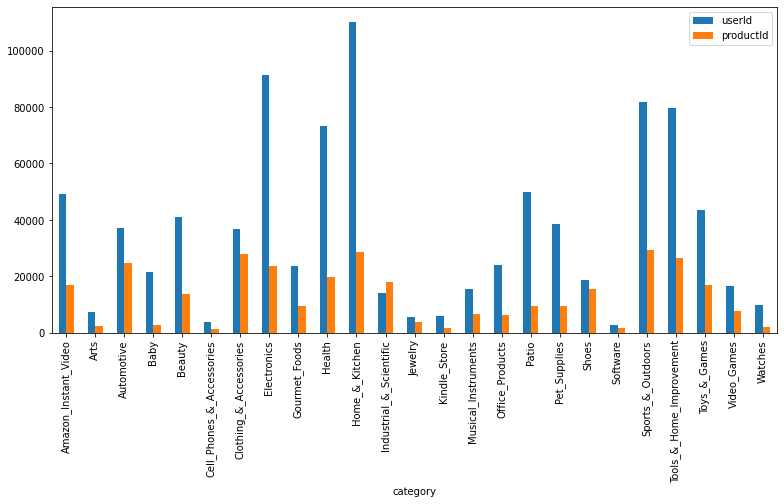

In [48]:
data_to_plot = df_clean1[["userId", "productId", "category"]].groupby("category").nunique()
data_to_plot.plot(kind = "bar")
plt.xticks(rotation=90)
plt.show()

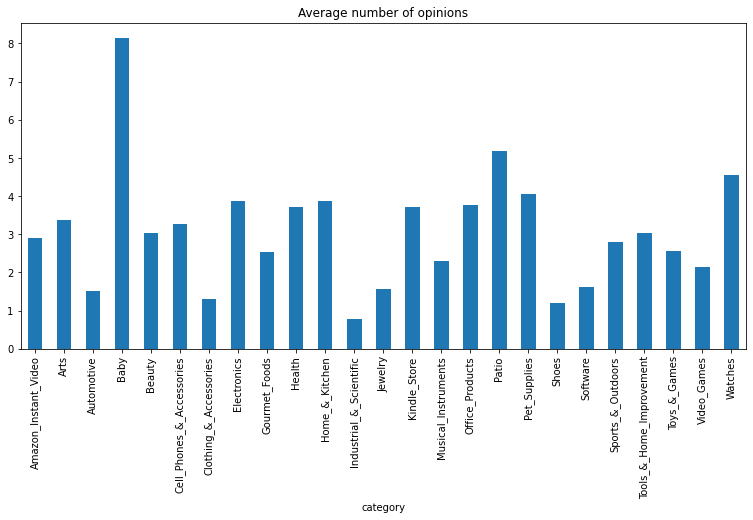

In [49]:
data_to_plot["average"] = data_to_plot["userId"] / data_to_plot["productId"] 
data_to_plot["average"].plot(kind="bar")
plt.xticks(rotation=90)
plt.title("Average number of opinions for product")
plt.show()

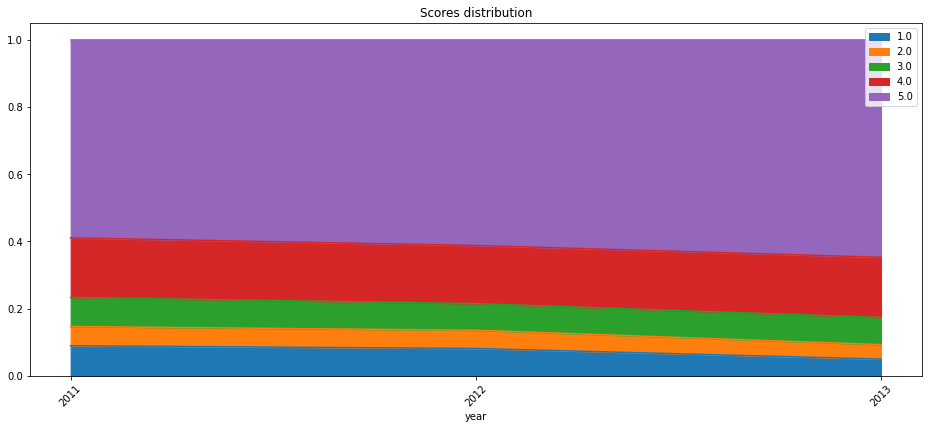

In [50]:
scores_by_years = df_clean1[["year", "score", "productId"]].groupby(["year", "score"]).count().reset_index().pivot("year", "score", "productId")
scores_by_years.apply(lambda x: x / x.sum(), axis=1).fillna(0).plot(kind="area")
plt.xticks(rotation=45)
plt.legend(loc=1)
plt.tight_layout()  
plt.title("Scores distribution")
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

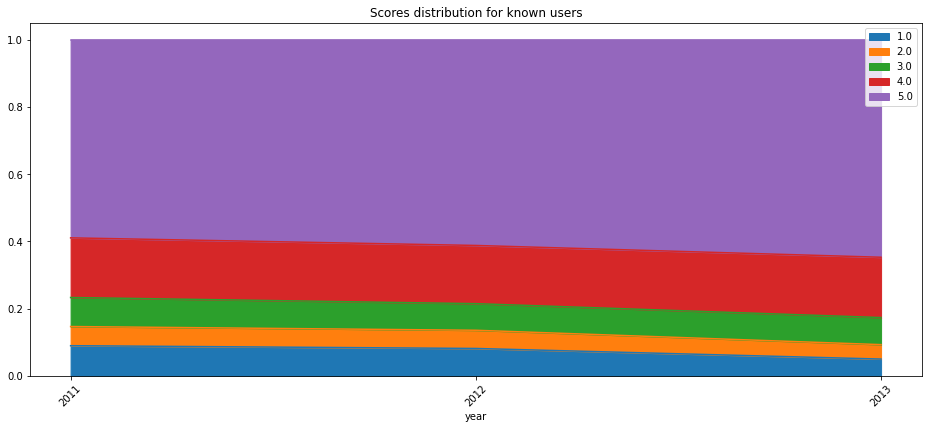

In [66]:
scores_by_years = df_clean1.loc[df_clean1["userId"] != "unknown" ,["year", "score", "productId"]].groupby(["year", "score"]).count().reset_index().pivot("year", "score", "productId")
scores_by_years.apply(lambda x: x / x.sum(), axis=1).fillna(0).plot(kind="area")
plt.xticks(rotation=45)
plt.legend(loc=1)
plt.tight_layout()  
plt.title("Scores distribution for known users")
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

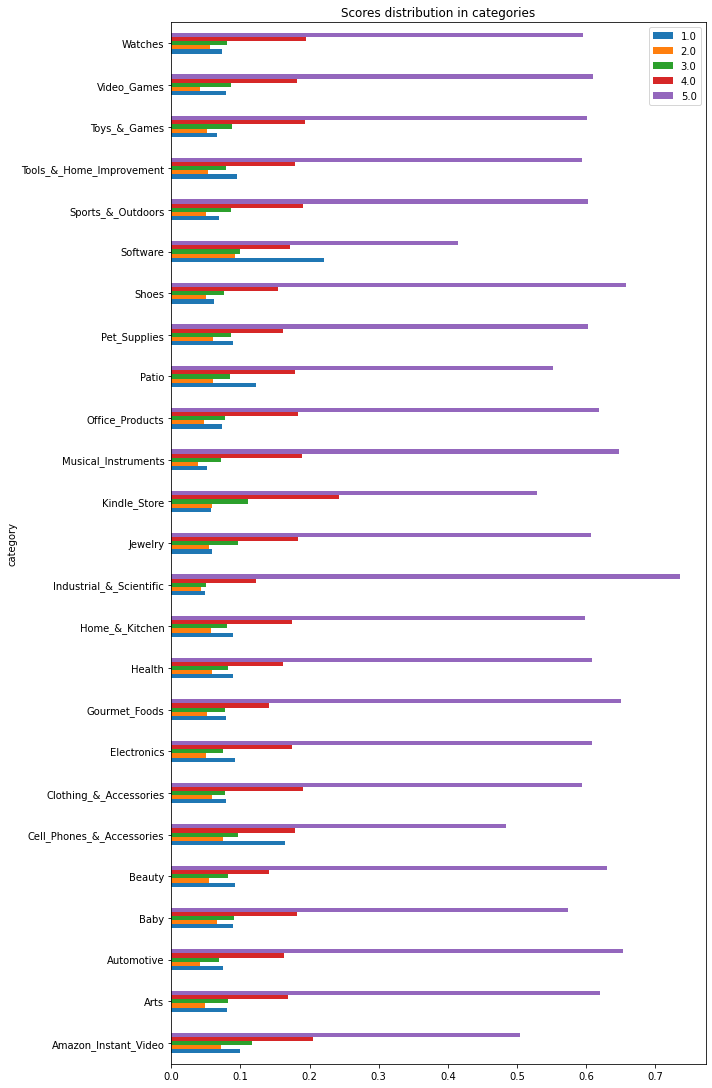

In [76]:
scores_by_years = df_clean1[["category", "score", "productId"]].groupby(["category", "score"]).count().reset_index().pivot("category", "score", "productId")
scores_by_years.apply(lambda x: x / x.sum(), axis=1).fillna(0).plot(kind="barh", figsize=(10, 15))
# plt.xticks(rotation=90)
plt.legend(loc=1)
plt.tight_layout()  
plt.title("Scores distribution in categories")
plt.show()

In [46]:
# df_train[["userId", "productId", "score"]].to_csv("data/train_valid_data_1.csv")
# df_test[["userId", "productId", "score"]].to_csv("data/test_data_1.csv")